In [92]:
import numpy as np
import scipy as sp
from math import pi, tanh
from cmath import sqrt
import matplotlib.pyplot as plt
from scipy.linalg import block_diag
from ipywidgets import interact
import time

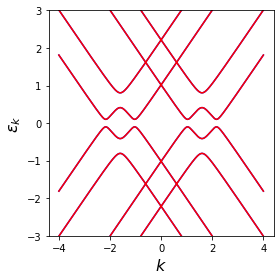

In [83]:
# nu=2 warm up
D1=0.2
D1t=0.
D2=0.1
k0u=2.2
k0d=1
vF=1

dmat= np.zeros((2,2))
dmat[0,0]= D2
dmat[0,1]= D1
dmat[1,0]= -D1
dmat[1,1]= D2
Hd=np.block([
    [np.zeros((2,2)), dmat],
    [-dmat, np.zeros((2,2))]
])

k_sw= np.linspace(-1,1,4001)*4
En1= np.zeros((len(k_sw),8))
En2= np.zeros((len(k_sw),8))
for i_k in range(len(k_sw)):
    H2= vF*k_sw[i_k]* np.kron(s0,np.kron(sz,s0))\
        - k0u* np.kron(sz,np.kron(s0,s_up))\
        - k0d* np.kron(sz,np.kron(s0,s_dn))\
        + D1*np.kron(sy,np.kron(sx,sy))\
        + D1t*np.kron(sy,np.kron(s0,sy))\
        + D2*np.kron(sy,np.kron(sy,s0))
    
    En2[i_k,:], _ = np.linalg.eigh(H2)

    Hp= vF*k_sw[i_k]*np.diag(np.concatenate((np.ones(2),-np.ones(2))))\
        -vF*np.diag([k0u,k0d,k0u,k0d])
    HpT= -vF*k_sw[i_k]*np.diag(np.concatenate((np.ones(2),-np.ones(2))))\
        -vF*np.diag([k0u,k0d,k0u,k0d])
    H1= np.block([
        [Hp, Hd],
        [np.matrix(Hd).H, -HpT]
    ])
    En1[i_k,:], _ = np.linalg.eigh(H1)
#        + D1*np.kron(sy,np.kron(sx,sy))\

    
plt.figure(figsize=(4,4))
plt.plot(k_sw,En2,'b')
plt.plot(k_sw,En1,'r')#,'o',markersize=1)

plt.xlabel('k')
plt.ylabel('E')
fsize=16
plt.ylabel(r"$\varepsilon_k$",fontsize = fsize)
plt.xlabel(r"$k$",fontsize = fsize)
plt.ylim(-3,3)
# plt.xlim(-1,4)
# plt.xticks([0,2,4])
# plt.yticks(np.arange(-2,2.1,1))
# plt.grid()
plt.tight_layout()
# plt.savefig('figs/nu2_eff_D12_%d_%d.pdf' % (100*D1,100*D2))
plt.show()



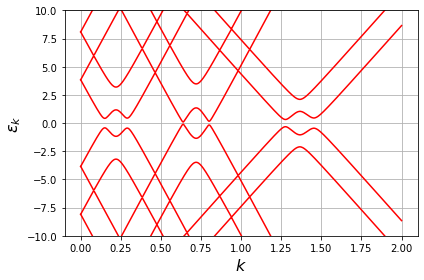

In [122]:
# nu=6 


vF=1
vF_6=0.6
k0s= np.array([0.14,0.3,0.629,0.81,vF_6*1.27,vF_6*1.46])
k0= np.diag(np.kron([1,1],k0s))

D1_eff=0.018
D2=0.0188
D3=0.004
D4=0.0066
D5=0.013
D6=0.018
D12=0.038
D23=0.0
D34=0.04
D45=0.
D56=0.02


# dmat= np.zeros((6,6))
dmat= np.array([[D1_eff,D12,0,0,0,0],
                [D12,D2,D23,0,0,0],
                [0,D23,D3,D34,0,0],
                [0,0,D34,D4,D45,0],
                [0,0,0,D45,D5,D56],
                [0,0,0,0,D56,D6]])
Hd=np.block([
    [np.zeros((6,6)), dmat],
    [-dmat, np.zeros((6,6))]
])

k_sw= np.linspace(0,1,401)*2
En1= np.zeros((len(k_sw),24))
for i_k in range(len(k_sw)):

    Hp= vF*k_sw[i_k]*np.diag(np.concatenate((np.ones(4),vF_6*np.ones(2),-np.ones(4),-vF_6*np.ones(2))))\
         -vF*k0
    HpT= -vF*k_sw[i_k]*np.diag(np.concatenate((np.ones(4),vF_6*np.ones(2),-np.ones(4),-vF_6*np.ones(2))))\
         -vF*k0
    H1= np.block([
        [Hp, Hd],
        [np.matrix(Hd).H, -HpT]
    ])
    En1[i_k,:], _ = np.linalg.eigh(H1)

fac=26.622359
# plt.figure()#figsize=(4,4))
plt.plot(k_sw,fac*En1,'r')#,'o',markersize=1)

plt.xlabel('k')
plt.ylabel('E')
fsize=16
plt.ylabel(r"$\varepsilon_k$",fontsize = fsize)
plt.xlabel(r"$k$",fontsize = fsize)
plt.ylim(-10,10)
# plt.xlim(-1,4)
# plt.xticks([0,2,4])
# plt.yticks(np.arange(-2,2.1,1))
plt.grid()
plt.tight_layout()
# plt.savefig('figs/nu2_eff_D12_%d_%d.pdf' % (100*D1,100*D2))
plt.show()



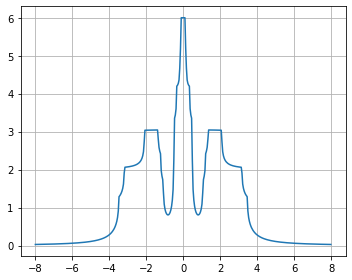

In [123]:
# T matrix with Z
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)

Z=0.
# Esw= np.linspace(-1,1,100)*7*D1
Esw0= np.linspace(-0.3,0.3,400)
# Esw0=np.array([-0.043589743589743594])

Ree=np.zeros((6,6,len(Esw0)))
Reh=np.zeros((6,6,len(Esw0)))


# vF=1
# # vF_6=0.5
# k0s= np.array([0.14,0.3,0.629,0.81,1.27,1.46])
# k0= np.diag(np.kron([1,1],k0s))

# D1_eff=0.018
# D2=0.0188
# D3=0.006
# D4=0.0066
# D5=0.013
# D6=0.018
# D12=0.038
# D23=0.0
# D34=0.04
# D45=0.
# D56=0.02

dmat= np.array([[D1_eff,D12,0,0,0,0],
                [-D12,D2,D23,0,0,0],
                [0,-D23,D3,D34,0,0],
                [0,0,-D34,D4,D45,0],
                [0,0,0,-D45,D5,D56],
                [0,0,0,0,-D56,D6]])
Hdelta=np.block([
    [np.zeros((6,6)), dmat],
    [-dmat.T, np.zeros((6,6))]
])

Ham= np.block([
    [-vF*k0, Hdelta],
    [np.matrix(Hdelta).H, vF*k0]
])

vk= vF*np.diag(np.concatenate((np.ones(6),-np.ones(6),np.ones(6),-np.ones(6))))
Hd= 1/vF*np.diag(np.concatenate((np.ones(6),-np.ones(6),np.ones(6),-np.ones(6))))
# Hd= np.linalg.inv(vk)

for i_E in range(len(Esw0)):
    E=Esw0[i_E]
#     print(E)
    Ht= np.dot(Hd,E*np.eye(24)-  Ham)
    evs, evecs = np.linalg.eig(Ht)
#     print(evs)
    
    i_evan= np.where( np.abs(np.imag(evs)) > 1e-5 )[0]
    ie_T= np.where( np.imag(evs[i_evan]) > 0)[0]
    ie_R= np.where( np.imag(evs[i_evan]) < 0)[0]

    i_prop= np.where( np.abs(np.imag(evs)) < 1e-5 )[0]
    evecs_inv=np.linalg.inv(evecs)
#     evecs_inv=np.transpose(evecs)
    Jmat = np.reshape(np.diag(np.dot(evecs_inv,np.dot(vk,evecs))),[24,])
    ip_T= np.where( np.real(Jmat[i_prop]) > 0)[0]
    ip_R= np.where( np.real(Jmat[i_prop]) < 0)[0]

    i_T=np.concatenate((i_prop[ip_T],i_evan[ie_T]))
    i_R=np.concatenate((i_prop[ip_R],i_evan[ie_R]))

    evecs= np.dot(evecs,np.diag(1/(Jmat+1j*0)**0.5))
    Tevecs = evecs[:,i_T]    
    Revecs = evecs[:,i_R]    
    evecs_0= np.concatenate((Tevecs,Revecs),axis=1)

    Revecs_l= np.kron(np.array([[0,1,0,0],[0,0,0,1]]).T,np.eye(6))
    Tevecs_l= np.kron(np.array([[1,0,0,0],[0,0,1,0]]).T,np.eye(6))
    evecs_l= np.concatenate((Tevecs_l,Revecs_l),axis=1)

    Tmat=sp.linalg.solve(evecs_0,evecs_l)
    Tz=[[1-1j*Z,0,-1j*Z,0],\
        [0,1+1j*Z,0,-1j*Z],\
        [1j*Z,0,1+1j*Z,0],\
        [0,1j*Z,0,1-1j*Z]]
#     Tz=[[np.cosh(Z),0,-1j*np.sinh(Z),0],\
#         [0,np.cosh(Z),0,-1j*np.sinh(Z)],\
#         [1j*np.sinh(Z),0,np.cosh(Z),0],\
#         [0,1j*np.sinh(Z),0,np.cosh(Z)]]
    Tt=np.dot(Tmat,np.kron(Tz,np.eye(6)))
    TLL=Tt[np.ix_(np.arange(12,24),np.arange(12,24))]
    TLR=Tt[np.ix_(np.arange(12,24),np.arange(0,12))]
    x= -sp.linalg.solve(TLL,TLR)
#     x= -np.dot(np.linalg.inv(TLL),TLR)
    Ree[:,:,i_E] = np.abs(x[0:6,0:6])**2
    Reh[:,:,i_E] = np.abs(x[6:12,0:6])**2

#     print(Ree[i_E],Reh[i_E])

fig, ax = plt.subplots(figsize=(5,4))


fac=26.622359
plt.plot(fac*Esw0,np.sum(np.sum(Reh,axis=1),axis=0))
# plt.plot(Esw0,Reh2_d,label='$\Delta_2=%.1f$' % (D22))

# ax.yaxis.set_minor_locator(AutoMinorLocator(2))

plt.tight_layout()
plt.grid()
# plt.savefig('figs/CAR_eff_nu2_vs_E.pdf')
plt.show()

In [168]:
# T matrix with random phase pairing

Nrep=10
Nimp=40
L=10/D1_eff
Z=0.1
Esw= np.linspace(0.0001,0.3,400)

Revecs_l= np.kron(np.array([[0,1,0,0],[0,0,0,1]]).T,np.eye(6))
Tevecs_l= np.kron(np.array([[1,0,0,0],[0,0,1,0]]).T,np.eye(6))
evecs_l= np.concatenate((Tevecs_l,Revecs_l),axis=1)
Tl=evecs_l
Tr=np.linalg.inv(evecs_l)
Tz=[[1-1j*Z,0,-1j*Z,0],\
    [0,1+1j*Z,0,-1j*Z],\
    [1j*Z,0,1+1j*Z,0],\
        [0,1j*Z,0,1-1j*Z]]
Tz=np.kron(Tz,np.eye(6))

vk= vF*np.diag(np.concatenate((np.ones(6),-np.ones(6),np.ones(6),-np.ones(6))))
Hd= 1/vF*np.diag(np.concatenate((np.ones(6),-np.ones(6),np.ones(6),-np.ones(6))))


t_timer=time.time()
np.random.seed()

Ree=np.zeros((len(Esw),Nrep))
Reh=np.zeros((len(Esw),Nrep))

# Dmat=(np.random.rand(Nimp,Nrep)-0.5)
Dmat=np.exp(1j*2*pi*np.random.rand(Nimp,Nrep))

x_imp_mat=np.random.rand(Nimp-1,Nrep)*L
for i_r in range(Nrep):
    print(' ',i_r,end=' \r')
    x_imp= np.sort(x_imp_mat[:,i_r])
    x_imp=np.concatenate(([0],x_imp,[L]))


    for i_E in range(len(Esw)):
        E=Esw[i_E]
        
        Tmat=np.dot(Tl,Tz)
        for i_n in range(Nimp):
            
            dmat=Dmat[i_n,i_r]*np.array([\
                [D1_eff,D12,0,0,0,0],
                [-D12,D2,D23,0,0,0],
                [0,-D23,D3,D34,0,0],
                [0,0,-D34,D4,D45,0],
                [0,0,0,-D45,D5,D56],
                [0,0,0,0,-D56,D6]])
            
            Hdelta=np.block([
                [np.zeros((6,6)), dmat],
                [-dmat.T, np.zeros((6,6))]
            ])

            Ham= np.block([
                [-vF*k0, Hdelta],
                [np.matrix(Hdelta).H, vF*k0]
            ])

            Tmat=np.dot(sp.linalg.expm(1j*np.dot(Hd,E*np.eye(24)-  Ham)*(x_imp[i_n+1]-x_imp[i_n])),Tmat)


        Tt=np.dot(Tr,Tmat)
        TLL=Tt[np.ix_(np.arange(12,24),np.arange(12,24))]
        TLR=Tt[np.ix_(np.arange(12,24),np.arange(0,12))]
        x= -sp.linalg.solve(TLL,TLR)
        Ree[i_E,i_r] = np.sum(np.sum(np.abs(x[0:6,0:6])**2,axis=1),axis=0)
        Reh[i_E,i_r] = np.sum(np.sum(np.abs(x[6:12,0:6])**2,axis=1),axis=0)

#     np.savez(fname+'_%d.npz' % (i_r) , E_list=Esw, Ree=Ree , Reh=Reh)
elapsed = time.time() - t_timer
print("Finished, elapsed time = %.0f " % (elapsed)+ "sec")

Finished, elapsed time = 131 sec


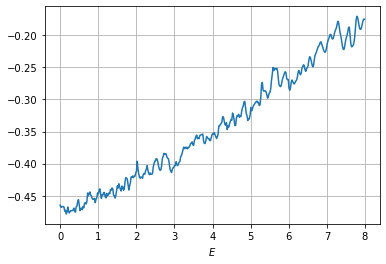

In [169]:
plt.figure()
# plt.plot(Esw,Reh)
# plt.plot(Esw,Ree)
# plt.plot(fac*Esw,np.mean(Reh,1))
# plt.plot(Esw,np.mean(Ree,1))
# plt.plot(fac*Esw,-np.mean(Reh,1)+np.mean(Ree,1))

nu=6
x = -np.mean(Reh,1)+np.mean(Ree,1)
plt.plot(fac*Esw,x/(nu-x))
plt.grid()
# plt.ylim(0,1.1)

plt.xlabel(r'$r_{eh}$')
plt.xlabel(r'$E$')
plt.show()

In [132]:
# T matrix with random disorder

Nrep=1
Nimp=1
L=20/D1_eff
Uimp=1.0
Zimp=0.2
Z=0.
Esw= np.linspace(0,0.3,400)

Ree=np.zeros((len(Esw),Nrep))
Reh=np.zeros((len(Esw),Nrep))

vk= vF*np.diag(np.concatenate((np.ones(6),-np.ones(6),np.ones(6),-np.ones(6))))
Hd= 1/vF*np.diag(np.concatenate((np.ones(6),-np.ones(6),np.ones(6),-np.ones(6))))


for i_E in range(len(Esw)):
    E=Esw[i_E]
    Ht= np.dot(Hd,E*np.eye(24)-  Ham)
    evs, evecs = np.linalg.eig(Ht)

    evecs_inv=np.linalg.inv(evecs)
    Jmat = np.reshape(np.diag(np.dot(evecs_inv,np.dot(vk,evecs))),[24,])
    evecs_0= np.dot(evecs,np.diag(1/(Jmat+1j*0)**0.5))
        
    Tl=evecs_l
    Tr=np.linalg.inv(evecs_l)
#     Tl=sp.linalg.solve(evecs_0,evecs_l)
#     Tr=sp.linalg.solve(evecs_l,evecs_0)
    Tz=[[1-1j*Z,0,-1j*Z,0],\
        [0,1+1j*Z,0,-1j*Z],\
        [1j*Z,0,1+1j*Z,0],\
        [0,1j*Z,0,1-1j*Z]]
    Tz=np.kron(Tz,np.eye(6))
#     Ts=[[1-1j*Zimp,0,-1j*Zimp,0],\
#         [0,1+1j*Zimp,0,-1j*Zimp],\
#         [1j*Zimp,0,1+1j*Zimp,0],\
#         [0,1j*Zimp,0,1-1j*Zimp]]
#     Ts=np.linalg.inv(Ts)
#     Ts=sp.linalg.expm(1j*Uimp*np.dot(Hd,np.kron(sz,sz)))

    def Asc(x):
        return np.dot(evecs,np.dot(np.diag(np.exp(1j*evs*x)),evecs_inv))
        
    for i_r in range(Nrep):

        x_imp=np.sort(np.random.rand(Nimp)*L)
        x_imp=np.concatenate(([0],x_imp))
        
#         Tmat=np.dot(Tl,Tz)
        Tmat=np.dot(Tl,Tz) #np.eye(4)
        for i_n in range(1,Nimp+1):
            Ur=np.random.rand()-0.5
            Ts=sp.linalg.expm(1j*Uimp*Ur*np.dot(Hd,np.kron(sz,np.kron(sx,s0))))
#             Ts=sp.linalg.expm(1j*Uimp*Ur*np.dot(Hd,np.kron(sz,np.kron(s0,s0))))
            Tmat=np.dot(Ts,np.dot(Asc(x_imp[i_n]-x_imp[i_n-1]),Tmat))
        Tmat=np.dot(Asc(L-x_imp[Nimp]),Tmat)
        Tt=np.dot(Tr,Tmat)
        TLL=Tt[np.ix_(np.arange(12,24),np.arange(12,24))]
        TLR=Tt[np.ix_(np.arange(12,24),np.arange(0,12))]
        x= -sp.linalg.solve(TLL,TLR)
        Ree[i_E,i_r] = np.sum(np.sum(np.abs(x[0:6,0:6])**2,axis=1),axis=0)
        Reh[i_E,i_r] = np.sum(np.sum(np.abs(x[6:12,0:6])**2,axis=1),axis=0)

print('Done!')

Done!


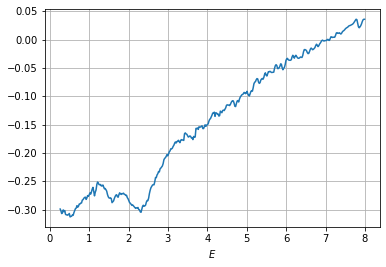

In [150]:
plt.figure()
# plt.plot(Esw,Reh)
# plt.plot(Esw,Ree)
# plt.plot(fac*Esw,np.mean(Reh,1))
# plt.plot(Esw,np.mean(Ree,1))
# plt.plot(fac*Esw,-np.mean(Reh,1)+np.mean(Ree,1))

nu=6
x = -np.mean(Reh,1)+np.mean(Ree,1)
plt.plot(fac*Esw,x/(nu-x))
plt.grid()
# plt.ylim(0,1.1)

plt.xlabel(r'$r_{eh}$')
plt.xlabel(r'$E$')
plt.show()